In [1]:
##NAME: STudent 1

##NETID:


##NAME: Student 2

##NETID:




# Model Selection In-Class Exercise

In this example, you will a linear model to data and select the model order by model order selection.  First load the standard packages.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Load the Data

The data in this exercise is completely synthetic.  You can load it with the following commmand.

In [4]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit04_model_sel/synth_data.p'
fn_dst = 'synth_data.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

with open(fn_dst,'rb') as fp:
    x,y = pickle.load(fp)

File synth_data.p is already downloaded


Plot the data `y` vs. `x` using a scatter plot. 

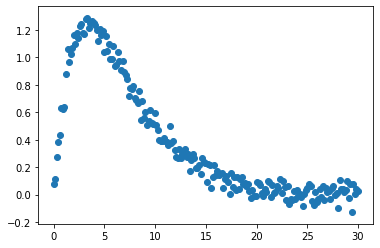

In [5]:
# TODO


plt.scatter(x, y)


## Fit the Data

We will now try to fit the data.  First, split the data into training and test.  You can use the `train_test_split()` method in the `sklearn` package.

In [10]:
# TODO
# xtr, xts, ytr, yts = train_test_split(...)
xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.5, random_state=37)

Now try to fit a linear model to the data.  You can pick any linear model with a variable number `d` of basis functions.  For example, you can use the polynomials up to degree `d-1`.  

For each model order `d`:
* Fit the model on the training data
* Test the model on the test data

Plot the test error vs. `d`.  Select the model order `dopt` with the lowest test error.

/home/gussand/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RankWarning: The fit may be poorly conditioned
  


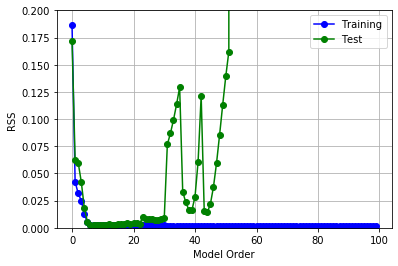

In [11]:
## TODO

# Import useful polynomial library
import numpy.polynomial.polynomial as poly


dtest = np.array(range(0,100))
RSSTest = []
RSSTrain = []

for d in dtest:
    
    # Fit the training data
    beta_hat = poly.polyfit(xtr, ytr, d)
    
    # Measure the RSS on Training data
    yhat = poly.polyval(xtr, beta_hat)
    RSS = np.mean((yhat-ytr)**2)
    RSSTrain.append(RSS)
    
    # Measure RSS on Test data
    yhat = poly.polyval(xts, beta_hat)
    RSS = np.mean((yhat-yts)**2)
    RSSTest.append(RSS)
    
    
#Plot
plt.plot(dtest, RSSTrain, 'bo-')
plt.plot(dtest, RSSTest, 'go-')
plt.xlabel('Model Order')
plt.ylabel('RSS')
plt.grid()
plt.ylim(0,0.2)
plt.legend(['Training', 'Test'], loc='upper right')

Select the optimal model order `dopt`.  Re-train the model for that model order.  On one plot:
* Plot the predicted value `yhat` vs. `x` for your model for `x in [0,35]`
* Plot a scatter plot of the test data `xts` vs. `yts`

Does your model fit the test data well?
Does it extrapolate reasonably in the range `x >= 30`?

In [13]:
# TODO
imin = np.argmin(RSSTest)
print("Estimated model order= {0:d}".format(dtest[imin]))

print (RSSTest)


Estimated model order= 6
[0.17175210661181523, 0.06247021914314285, 0.05994389822260241, 0.04233135188760358, 0.018156439487512065, 0.0056689736315000076, 0.0028415631946290074, 0.002906621423683903, 0.002898220710806603, 0.002905086122962887, 0.002970696002766734, 0.003003119379553611, 0.0030996152327647463, 0.002998223403334176, 0.0029899532679021046, 0.003321604913301569, 0.00339096216531225, 0.003273987523186661, 0.004360690225001714, 0.003893607420112852, 0.004862617317977355, 0.004112788892309047, 0.0037323378756235564, 0.009830452631776872, 0.00851697002690547, 0.007876567366310377, 0.007703223792947867, 0.007567642540635634, 0.00746853802468334, 0.008136456959350438, 0.009465688913191264, 0.07670412607009668, 0.08684457831959735, 0.09928566544366113, 0.11355949854185131, 0.12920301698508493, 0.03313975961697523, 0.023389093775665625, 0.016416615143286697, 0.016295332640268344, 0.02866009357103618, 0.060787079755607654, 0.12126578183912713, 0.015138875009794621, 0.01415828818207

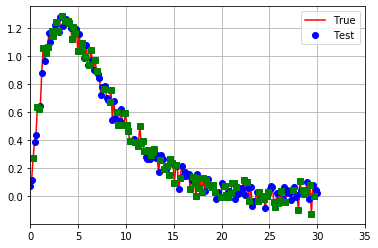

In [27]:
#TODO

# now that we know that the best is 7

# Fit the training data
beta_hat = poly.polyfit(x, y, 7)
yhat = poly.polyval(x, beta_hat)

plt.xlim(0,35)
plt.plot(x, y, 'r-')

plt.plot(xtr, ytr, 'bo')
plt.plot(xts, yts, 'gs')
plt.grid()
plt.legend(['True', 'Test'])


